In [30]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Stations

In [31]:
stations = pd.read_csv('./posicion.csv', delimiter=';')
stations.head()

,Codigo,Lat,Long,x,y
0,S01,41.6538,-0.876258,676837.98,4613524.38
1,S02,41.6496,-0.884854,676133.56,4613041.96
2,S03,41.6602,-0.871698,677200.12,4614245.63
3,S04,41.6460,-0.900291,674857.72,4612612.12
4,S05,41.6505,-0.904937,674458.88,4613093.96


In [32]:
stations = stations[['Codigo', 'x', 'y']]
stations.head()

,Codigo,x,y
0,S01,676837.98,4613524.38
1,S02,676133.56,4613041.96
2,S03,677200.12,4614245.63
3,S04,674857.72,4612612.12
4,S05,674458.88,4613093.96


In [33]:
# Change columns name
stations.columns = ['code', 'lat', 'lon']
stations.head()

,code,lat,lon
0,S01,676837.98,4613524.38
1,S02,676133.56,4613041.96
2,S03,677200.12,4614245.63
3,S04,674857.72,4612612.12
4,S05,674458.88,4613093.96


In [34]:
import folium
from pyproj import Transformer

In [35]:
# Transform coordinates from ETRS89 to WRS84
transformer = Transformer.from_crs('EPSG:25830', 'EPSG:4326')

zgz_coords = (41.653858, -0.876258)
map = folium.Map(location=zgz_coords, zoom_start=13)

# Iterate over each station
for index, station in stations.iterrows():
    lat, lon = transformer.transform(station['lat'], station['lon'])

    stations.at[index, 'lat'] = lat
    stations.at[index, 'lon'] = lon
    # Add a marker for the point
    folium.Marker([lat, lon], popup=station['code']).add_to(map)

# If running in a Jupyter Notebook, display the map inline
map

## Temperatures

In [7]:
temperature_files = sorted(glob.glob('./S*ayunt.csv'))
temperature_files

['./S01_CMJ_ayunt.csv',
 './S02_AYT_ayunt.csv',
 './S03_EST_ayunt.csv',
 './S04_IJV_ayunt.csv',
 './S05_DEL_ayunt.csv',
 './S06_IAN_ayunt.csv',
 './S07_PAG_ayunt.csv',
 './S08_ACT_ayunt.csv',
 './S09_FNT_ayunt.csv',
 './S10_AEM_ayunt.csv',
 './S11_BOT_ayunt.csv',
 './S12_OLI_ayunt.csv',
 './S13_CAM_ayunt.csv',
 './S14_VAL_ayunt.csv',
 './S15_POL_ayunt.csv',
 './S16_MOV_ayunt.csv',
 './S17_COG_ayunt.csv',
 './S18_SGR_ayunt.csv',
 './S19_RZD_ayunt.csv',
 './S20_PAT_ayunt.csv',
 './S21_VET_ayunt.csv']

In [8]:
all_dataframes = [pd.read_csv(csv_file, delimiter=',') for csv_file in temperature_files]

# Add a column 'station' with the index of the dataframe
for i, df in enumerate(all_dataframes):
    df['station'] = i+1
    
temperatures = pd.concat(all_dataframes, ignore_index=True)

In [9]:
temperatures.head()

,date,Temp,Hum,station
0,2020-01-01 00:00:00,3.00,84.68,1
1,2020-01-01 01:00:00,3.13,85.13,1
2,2020-01-01 02:00:00,2.48,86.59,1
3,2020-01-01 03:00:00,2.23,87.65,1
4,2020-01-01 04:00:00,1.97,88.40,1


In [10]:
# Split the 'date' column into 'date' and 'time' columns
temperatures[['date', 'time']] = temperatures['date'].str.split(' ', expand=True)
temperatures.head()

,date,Temp,Hum,station,time
0,2020-01-01,3.00,84.68,1,00:00:00
1,2020-01-01,3.13,85.13,1,01:00:00
2,2020-01-01,2.48,86.59,1,02:00:00
3,2020-01-01,2.23,87.65,1,03:00:00
4,2020-01-01,1.97,88.40,1,04:00:00


In [11]:
#temperatures = temperatures[temperatures['time'] == '23:00:00']
temperatures.head()

,date,Temp,Hum,station,time
0,2020-01-01,3.00,84.68,1,00:00:00
1,2020-01-01,3.13,85.13,1,01:00:00
2,2020-01-01,2.48,86.59,1,02:00:00
3,2020-01-01,2.23,87.65,1,03:00:00
4,2020-01-01,1.97,88.40,1,04:00:00


In [12]:
dates = [
    "2023-06-02",
    "2023-06-14",
    "2023-06-17",
    "2023-06-22",
    "2023-06-24",
    "2023-06-27",
    "2023-06-29",
    "2023-07-02",
    "2023-07-04",
    "2023-07-09",
    "2023-07-14",
    "2023-07-17",
    "2023-07-19",
    "2023-07-24",
    "2023-07-27",
    "2023-07-29",
    "2023-08-01",
    "2023-08-06",
    "2023-08-08",
    "2023-08-11",
    "2023-08-13",
    "2023-08-16",
    "2023-08-21",
    "2023-08-23"
]

In [13]:
# Filter by date
#temperatures = temperatures[temperatures['date'].isin(dates)]
temperatures.head()

,date,Temp,Hum,station,time
0,2020-01-01,3.00,84.68,1,00:00:00
1,2020-01-01,3.13,85.13,1,01:00:00
2,2020-01-01,2.48,86.59,1,02:00:00
3,2020-01-01,2.23,87.65,1,03:00:00
4,2020-01-01,1.97,88.40,1,04:00:00


In [14]:
# Filter by date interval
start_date = '2023-06-01'
end_date = '2023-08-31'

temperatures = temperatures[(temperatures['date'] >= start_date) & (temperatures['date'] <= end_date)]

In [15]:
temperatures = temperatures[['date', 'time', 'station', 'Temp']]
temperatures.head()

,date,time,station,Temp
29924,2023-06-01,00:00:00,1,20.72
29925,2023-06-01,01:00:00,1,20.07
29926,2023-06-01,02:00:00,1,19.00
29927,2023-06-01,03:00:00,1,18.53
29928,2023-06-01,04:00:00,1,18.57


In [16]:
# Sort the dataframe by the 'date' column
temperatures = temperatures.sort_values(by=['date', 'time', 'station'])

# Reset index
temperatures = temperatures.reset_index(drop=True)

# Change column names
temperatures.columns = ['date', 'time', 'station', 'temp']

temperatures.head()

,date,time,station,temp
0,2023-06-01,00:00:00,1,20.720
1,2023-06-01,00:00:00,2,19.950
2,2023-06-01,00:00:00,3,19.560
3,2023-06-01,00:00:00,4,19.865
4,2023-06-01,00:00:00,5,19.950


### Compute average first and then the differences respect to station 19

In [17]:
'''# Compute average temperature for each station
temperatures = temperatures.groupby('station')['temp'].mean().reset_index()

# Get the average temperature of station 19
station_19_avg = temperatures[temperatures['station'] == 19]['temp'].values[0]

# Compute the difference with respect to station 19
temperatures['diff_from_19'] = station_19_avg - temperatures['temp']

temperatures'''

"# Compute average temperature for each station\ntemperatures = temperatures.groupby('station')['temp'].mean().reset_index()\n\n# Get the average temperature of station 19\nstation_19_avg = temperatures[temperatures['station'] == 19]['temp'].values[0]\n\n# Compute the difference with respect to station 19\ntemperatures['diff_from_19'] = station_19_avg - temperatures['temp']\n\ntemperatures"

### For each day compute difference between each station and station 21, and then compute average temperature value for each station

In [18]:
# Merge the dataframe with itself to compute the difference with the reference station
df_ref = temperatures[temperatures['station'] == 19][['date', 'time', 'temp']].rename(columns={'temp': 'temp_ref'})
df_merged = pd.merge(temperatures, df_ref, on=['date', 'time'])
df_merged

,date,time,station,temp,temp_ref
0,2023-06-01,00:00:00,1,20.720000,17.463000
1,2023-06-01,00:00:00,2,19.950000,17.463000
2,2023-06-01,00:00:00,3,19.560000,17.463000
3,2023-06-01,00:00:00,4,19.865000,17.463000
4,2023-06-01,00:00:00,5,19.950000,17.463000
...,...,...,...,...,...
46363,2023-08-31,23:00:00,17,22.011000,20.553146
46364,2023-08-31,23:00:00,18,21.987000,20.553146
46365,2023-08-31,23:00:00,19,20.553146,20.553146
46366,2023-08-31,23:00:00,20,21.400000,20.553146


In [19]:
# Compute the daily temperature difference from reference station for each station
df_merged['temp_diff'] = df_merged['temp'] - df_merged['temp_ref']
df_merged

,date,time,station,temp,temp_ref,temp_diff
0,2023-06-01,00:00:00,1,20.720000,17.463000,3.257000
1,2023-06-01,00:00:00,2,19.950000,17.463000,2.487000
2,2023-06-01,00:00:00,3,19.560000,17.463000,2.097000
3,2023-06-01,00:00:00,4,19.865000,17.463000,2.402000
4,2023-06-01,00:00:00,5,19.950000,17.463000,2.487000
...,...,...,...,...,...,...
46363,2023-08-31,23:00:00,17,22.011000,20.553146,1.457854
46364,2023-08-31,23:00:00,18,21.987000,20.553146,1.433854
46365,2023-08-31,23:00:00,19,20.553146,20.553146,0.000000
46366,2023-08-31,23:00:00,20,21.400000,20.553146,0.846854


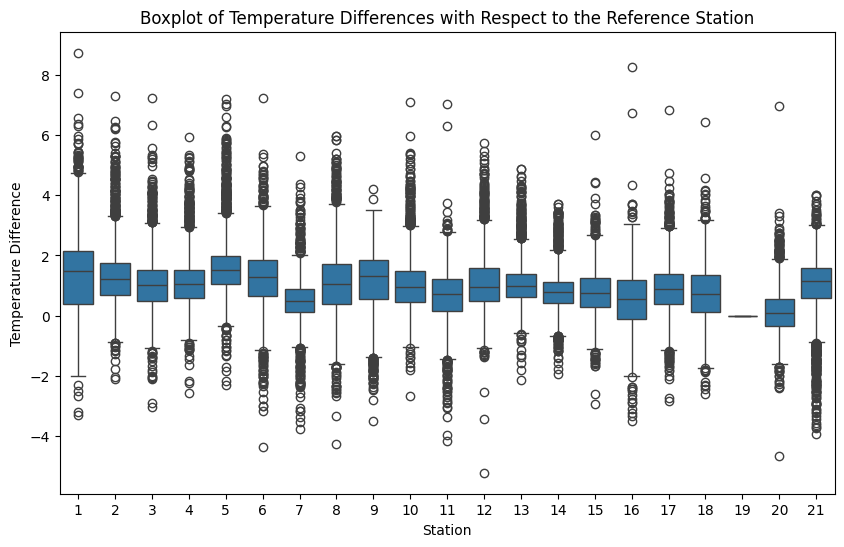

In [20]:
#df_filtered = df_merged[df_merged['station'] != 19]
df_filtered = df_merged

# Create a boxplot for each station showing the temperature differences
plt.figure(figsize=(10, 6))
sns.boxplot(x='station', y='temp_diff', data=df_filtered)

plt.title('Boxplot of Temperature Differences with Respect to the Reference Station')
plt.xlabel('Station')
plt.ylabel('Temperature Difference')

plt.show()

In [21]:
df_filtered = df_filtered.groupby('station')['temp_diff'].mean().reset_index()
df_filtered

,station,temp_diff
0,1,1.396381
1,2,1.320874
2,3,1.069900
3,4,1.115054
4,5,1.633224
5,6,1.239695
6,7,0.504829
7,8,1.076494
8,9,1.148487
9,10,1.049516


In [22]:
stations.head()

,code,lat,lon
0,S01,41.653858,-0.876258
1,S02,41.649671,-0.884855
2,S03,41.660269,-0.871698
3,S04,41.646083,-0.900292
4,S05,41.650508,-0.904937


In [23]:
# Remove 'S' and convert the remaining part to integer
stations['code'] = stations['code'].apply(lambda x: int(x[1:]))
stations.head()

,code,lat,lon
0,1,41.653858,-0.876258
1,2,41.649671,-0.884855
2,3,41.660269,-0.871698
3,4,41.646083,-0.900292
4,5,41.650508,-0.904937


In [26]:
data = pd.merge(df_filtered, stations, left_on='station', right_on='code')
data = data.drop(columns=['code'])
data.head()

,station,temp_diff,lat,lon
0,1,1.396381,41.653858,-0.876258
1,2,1.320874,41.649671,-0.884855
2,3,1.069900,41.660269,-0.871698
3,4,1.115054,41.646083,-0.900292
4,5,1.633224,41.650508,-0.904937


In [27]:
#data = data.drop(columns=['code', 'temp', 'temp_ref'])
#data.head()

In [29]:
data.to_csv('diff.csv', index=False)

## Generate shapefile

In [27]:
import geopandas as gpd
from shapely.geometry import Point

In [28]:
# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(data['lon'], data['lat'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry)

# Set CRS and save
filename = 'temp_diff_for_each_station.shp'
gdf.set_crs(epsg=4326, inplace=True)
gdf = gdf.to_crs('EPSG:23029')
gdf.to_file(filename)

In [29]:
gdf.crs

<Projected CRS: EPSG:23029>
Name: ED50 / UTM zone 29N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - between 12°W and 6°W - Faroe Islands - onshore; Spain - mainland onshore; Ireland offshore.
- bounds: (-12.0, 36.13, -6.0, 62.41)
Coordinate Operation:
- name: UTM zone 29N
- method: Transverse Mercator
Datum: European Datum 1950
- Ellipsoid: International 1924
- Prime Meridian: Greenwich